#  SP: Tonelada métrica per cápita de emisiones de CO2
Charbely Cisneros A01720514

## Imports, carga de archivo y limpieza

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 3.1 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.8 MB/s            
     |████████████████████████████████| 233 kB 71.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.8 MB/s            
     |████████████████████████████████| 306 kB 53.1 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=676647aef923aeb80c6197577701122df6fc5a12d95814a4098893950bd0eea8
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import numpy as np
from sklearn import linear_model

In [7]:
df=pd.read_excel('datasets/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls',
                 sheet_name='Data',
                skiprows=range(3))

In [8]:
df.columns=list(map(str,df.columns))

In [9]:
df['Total']=df.iloc[:,5:].sum(axis=1)
df.head()
df.set_index('Country Name',inplace=True)

In [10]:
df.drop(['2019',    '2020'],
        inplace=True,
        axis=1
       )
#df.columns

In [11]:
años=list(map(str,range(1960,2019)))
#años

## Introducción

Este conjunto de datos fue generado por el centro Carbon Dioxide Information Analysis Center de Tennessee en los Estados Unidos y fue extraido de la página de The World Bank.

Enlace a The World Bank para descargar: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart  

### Descripción de los datos

En este set de datos podemos encontrar las toneladas métricas de emisiones de CO2 (dioxido de carbono) de 236 países de los años 1960-2018.

La tabla tiene las siguientes columnas:


In [12]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

De interes:
* 'Country Name' es un variable cualitativa, explica los nombres de los países bajo estudio.
* 'Country Code' es un variable cualitativa, explica el codigo de los países bajo estudio.
* 'Region' es una variable cualitativa, explica la región donde pertenecen los países bajo estudio. Tiene como opciones: Europe & Central Asia, Latin America & Caribbean, Middle East & North Africa, North America, South Asia, Sub-Saharan Africa y East Asia & Pacific.
* '1960' - '2018' es una variable cuantitativa, explica las cantidad de toneladas metricas de emisiones de CO2 por cada país bajo estudio en ese año.
* 'Total' es una variable cuantitativa, contiene la suma de toneladas metricas de emisiones de CO2 de cada país en los años 1960-2018.
* 'Income Group' es una variable cualitativa, explica el grupo de ingresos de los países bajo estudio. Tiene como opciones: High income, Low income, Lower middle income, Upper middle income


### Tabla

In [13]:
df

,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,8.813541
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,40.564875
Albania,ALB,Europe & Central Asia,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,...,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,97.965540
Andorra,AND,Europe & Central Asia,High income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,...,6.157198,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405,196.566394
United Arab Emirates,ARE,Middle East & North Africa,High income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.119037,0.109136,0.163542,0.175833,0.132815,...,19.043279,18.589933,19.223116,20.015421,19.951852,20.948092,21.307610,21.950614,20.797498,1794.578010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,East Asia & Pacific,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.135031,0.163542,0.158377,0.184037,0.208106,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588,40.887810
"Yemen, Rep.",YEM,Middle East & North Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,...,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,26.085665
South Africa,ZAF,Sub-Saharan Africa,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,...,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,442.350573


## Pregunta de Investigación 1: ¿Cuál es el comportamiento de México en sus emisiones de CO2?

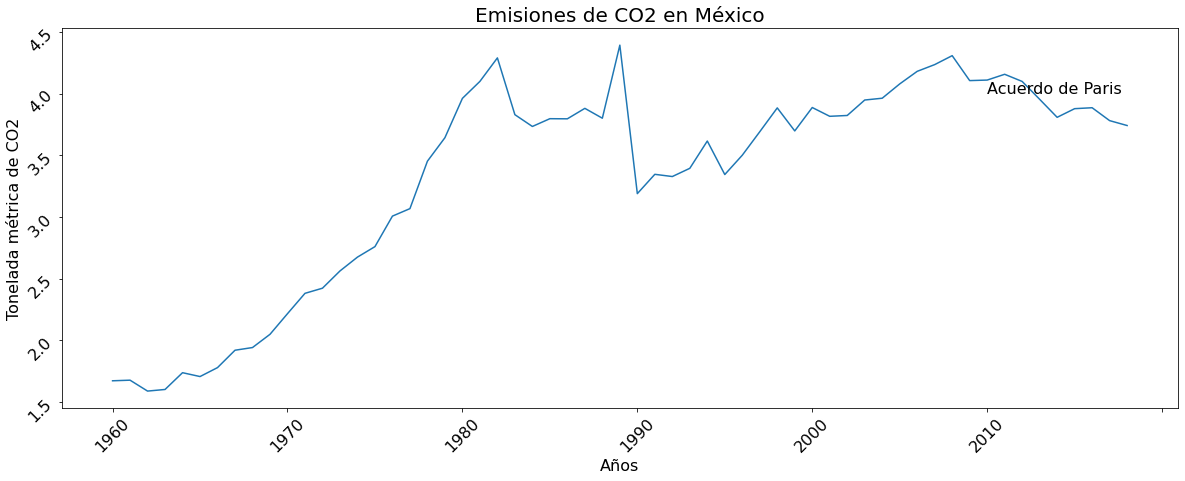

In [14]:
dfmex=df.loc['Mexico',años]

dfmex.plot(kind='line',figsize=(20,7))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 en México', fontsize=20)

plt.xlabel('Años', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
plt.text(50,4,'Acuerdo de Paris', fontsize=16)
plt.show()

### Conclusión

* México ha incrementado sus emisiones de CO2 desde 1960.
* Desde el Acuerdo de París, México ha tenido una tendencia negativa en sus emisiones de CO2. 

## Pregunta de Investigación 2: ¿Cuáles son los países que han emitido más CO2 durante los años?  ¿Cuáles son los que han emitido menos CO2?

Text(0, 0.5, 'Tonelada métrica de CO2')

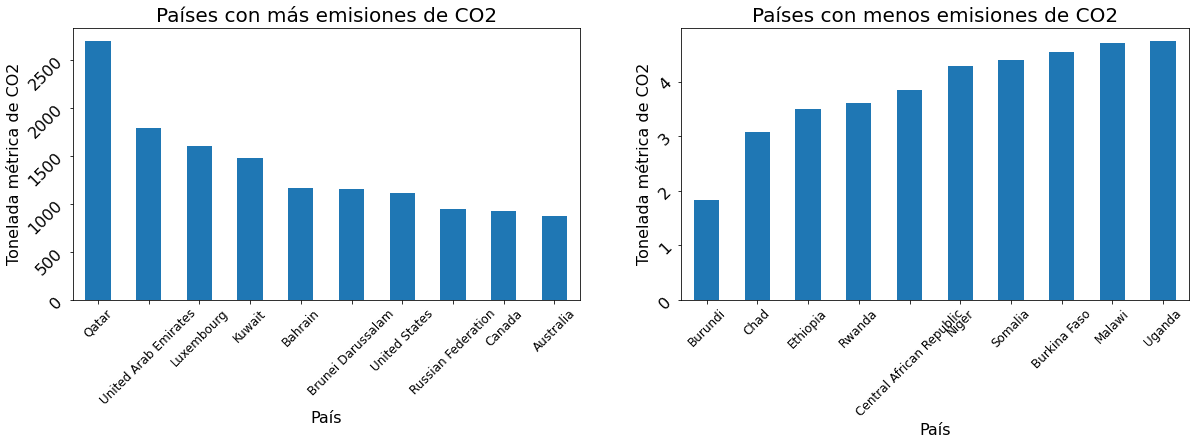

In [15]:
df_topten=df.sort_values(by='Total', 
                          ascending=False,
                          axis=0,
                         )
df_topten=df_topten.head(10)
df_topten=df_topten.loc[:,'Total']

df_bottten=df.sort_values(by='Total', 
                          ascending=True,
                          axis=0,
                         )
df_bottten=df_bottten.head(10)
df_bottten=df_bottten.loc[:,'Total']

fig=plt.figure()

ax1=fig.add_subplot(1,2,1) #1 renglon, 2 columnas, posicion 1
df_topten.plot(kind='bar',figsize=(20,5))

plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con más emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)   

ax2=fig.add_subplot(1,2,2) #1 renglon, 2 columnas, posicion 2
df_bottten.plot(kind='bar')
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con menos emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* Muchos de los que se encuentran en los mayores lugares son del Middle East y América del Norte. 
* Al igual, los que se enuentran en la gráfica de menores emisiones de CO2 son de Africa. 

## Pregunta de Investigación 3: ¿Qué regiones son las que más emiten CO2?

Text(0, 0.5, 'Tonelada métrica de CO2')

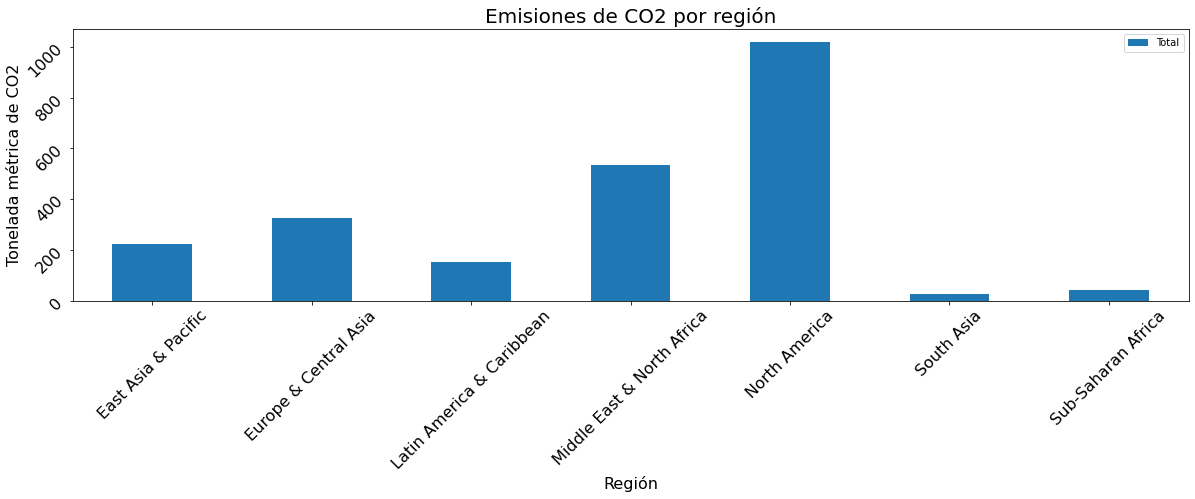

In [16]:
my_pivot=pd.pivot_table(df,
                        index='Region',
                        values='Total',
                       )
my_pivot.plot(kind='bar',figsize=(20,5))
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 por región', fontsize=20)

plt.xlabel('Región', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* En esta gráfica podemos observar que las regiones con mayor emisiones de CO2 son "Middle East & North Africa" y "North America."
* La región con menores emisiones de CO2 son de "South Asia" y "Sub-Saharan Africa."
* ¿El estar en un tipo de región tiene un impacto en la cantidad de emisiones de CO2?

## Pregunta de Investigación 4: ¿Hay algín impacto de estar en un tipo de Income group con las emisiones totales de CO2?

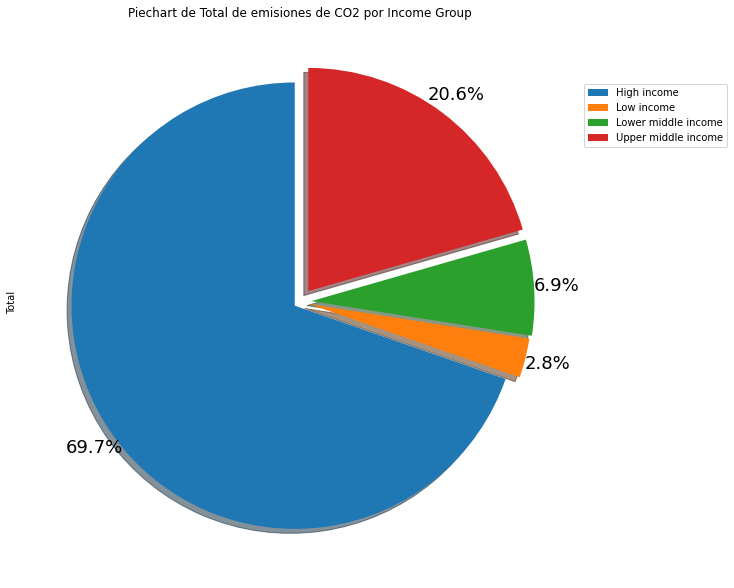

In [40]:
my_pivot2=pd.pivot_table(df,index='IncomeGroup', values='Total')

#my_pivot2=my_pivot2.drop([0],axis=0)
my_pivot2=my_pivot2.reset_index()
my_pivot2=my_pivot2.rename({'index':'IncomeGroup'}, axis=1)

explode_list =[0.03,0.04,0.05,0.06]

my_pivot2['Total'].plot(kind='pie',
                        figsize=(10,15),
                        startangle=90,
                        labels=None,
                        autopct='%1.1f%%',
                        pctdistance=1.1,
                        explode=explode_list,
                        shadow=True,
                        textprops={'fontsize':18})

plt.legend(labels=my_pivot2.IncomeGroup,bbox_to_anchor=(1.0,0.9))
plt.title('Piechart de Total de emisiones de CO2 por Income Group')
plt.show()

### Conclusión

* De los paises que más emiten CO2, tienen un High Income
* Esta podría ser una variable significativa para un modelo de regresión

## Pregunta de Investigación 5: ¿Hay alguna relación entre el tipo de región, income group y sus emisiones de CO2?

In [21]:
modelA= sm.OLS.from_formula('Total~Region+IncomeGroup', data=df)
resultA= modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     19.00
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           5.08e-22
Time:                        17:30:29   Log-Likelihood:                -1301.8
No. Observations:                 188   AIC:                             2624.
Df Residuals:                     178   BIC:                             2656.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              542.5084     58.935      9.205      0.000     426.207     658.810
Region[T.Europe & Central Asia]        -69.9517     62.908     -1.112      0.268    -194.093      54.189
Region[T.Latin America & Caribbean]    -86.4064     66.310     -1.303      0.194    -217.262      44.449
Region[T.Middle East & North Africa]   257.9515     73.939      3.489      0.001     112.042     403.861
Region[T.North America]                475.8439    188.277      2.527      0.012     104.302     847.386
Region[T.South Asia]                   -44.9036    102.880     -0.436      0.663    -247.926     158.119
Region[T.Sub-Saharan Africa]           -32.8038     67.129     -0.489      0.626    -165.276      99.668
IncomeGroup[T.Low income]             -510.4932     79.116     -6.452      0.000    -666.619    -354.367
IncomeGroup[T.Lower middle income]    -484.4509     57.477     -8.429      0.000    -597.874    -371.028
IncomeGroup[T.Upper middle income]    -344.4418     51.954     -6.630      0.000    -446.967    -241.917
==============================================================================
Omnibus:                      176.378   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3892.542
Skew:                           3.479   Prob(JB):                         0.00
Kurtosis:                      24.178   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones
* Variable dependiente: 'Total'
* Variable independiente: 'Region' y 'IncomeGroup'
* R-sq: 0.490; por lo tanto, este modelo no es tan bueno ya que solo explica el 49% de la variación basada en las variables 'Region' y 'IncomeGroup'
...
* Df model: 9
* Intercept... < 0.05,  es estadisticamente sigificativa para el modelo

` Total = 224.5964 + 102.9719*R(Europe_CentralAsia) - 69.5717*R(LatinAmerica_Caribbean) + 310.5905*R(MiddleEast_NorthAfrica) + 793.7558*R(NorthAmerica) - 197.1967*R(SouthAsia) - 183.3518*R(Sub-SaharanAfrica) - 510.4932*IG(LowIncome) - 484.4509*IG(LowerMiddleIncome) - 344.4418*IG(UpperMiddleIncome) `

### Caso de estudio:
DF Model: 6
* R(Europe_CentralAsia) = False 
* R(LatinAmerica_Caribbean) = False 
* R(MiddleEast_NorthAfrica) = False 
* R(NorthAmerica) = True 
* R(SouthAsia) = False 
* R(Sub-SaharanAfrica) = False 
* IG(LowIncome) = False 
* IG(LowerMiddleIncome) = False 
* IG(UpperMiddleIncome) = False

In [36]:
print('Las emisiones totales de CO2 de un país de Norte America con un high income es \t', 224.5964 + 102.9719*0 - 69.5717*0 + 310.5905*0 + 793.7558*1 - 197.1967*0 - 183.3518*0- 510.4932*0 - 484.4509*0 - 344.4418*0 )

df.iloc[-11:-10,1:3]

Las emisiones totales de CO2 de un país de Norte America con un high income es 	 1018.3522


,Region,IncomeGroup
Country Name,,
United States,North America,High income


In [37]:
df.iloc[-11:-10,64:]

,Total
Country Name,
United States,1112.701532


### Conclusión
* El modelo no es muy confiable.
* Hay más variable que pudieran tener un impacto en las emisiones de CO2

## Stakeholders

* Gobierno (SEMARNAT)
* Empresas que busquen ser más amigables al medio ambiente
* Organizaciones no lucrativas que busquen hacer un impacto positivo ambiental
* United Nations (ODS)

## Conclusión